# Prueba Rappi

## Parte 1: Análisis exploratorio de los datos

In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

from matplotlib import rcParams

import datetime
import os

os.chdir(r"E:/Prueba Rappi/Prueba-Rappi/documentos")
os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'

rcParams['figure.figsize'] = 18.7,6.27

In [81]:
dataset = pd.read_csv("Orders.csv")

# Convertir las fechas a datetime
dataset['created_at'] = pd.to_datetime(dataset['created_at'])


### 1. Análisis preliminar de los datos

En esta sección nos centraremos en analizar los datos de manera que nos permita dar una mejor visión y contexto de los registros trabajados. 

#### Identificación de valores faltantes o valores nulos

In [82]:
dataset.isnull().sum()

order_id             0
store_id             0
to_user_distance     0
to_user_elevation    0
total_earning        0
created_at           0
taken                0
dtype: int64

In [83]:
dataset.isna().sum()

order_id             0
store_id             0
to_user_distance     0
to_user_elevation    0
total_earning        0
created_at           0
taken                0
dtype: int64

En este conjunto de datos, no se identifican valores faltantes o nulos.

#### Estadística descriptiva básica

In [84]:
dataset.describe()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,taken
count,1.255490e+05,1.255490e+05,125549.000000,125549.000000,125549.000000,125549.000000
mean,1.507838e+07,7.485716e+08,1.476668,27.369828,5374.313360,0.922827
std,4.752629e+05,3.298381e+08,0.846750,84.818191,1784.919817,0.266867
min,1.421073e+07,3.000000e+07,0.000000,-260.333130,0.000000,0.000000
25%,1.467255e+07,9.000043e+08,0.809372,-18.417603,4200.000000,1.000000
50%,1.509367e+07,9.000077e+08,1.360573,11.781250,5200.000000,1.000000
75%,1.547552e+07,9.000127e+08,2.003069,62.978638,6400.000000,1.000000
max,1.590252e+07,9.000173e+08,9.360177,975.226074,108200.000000,1.000000


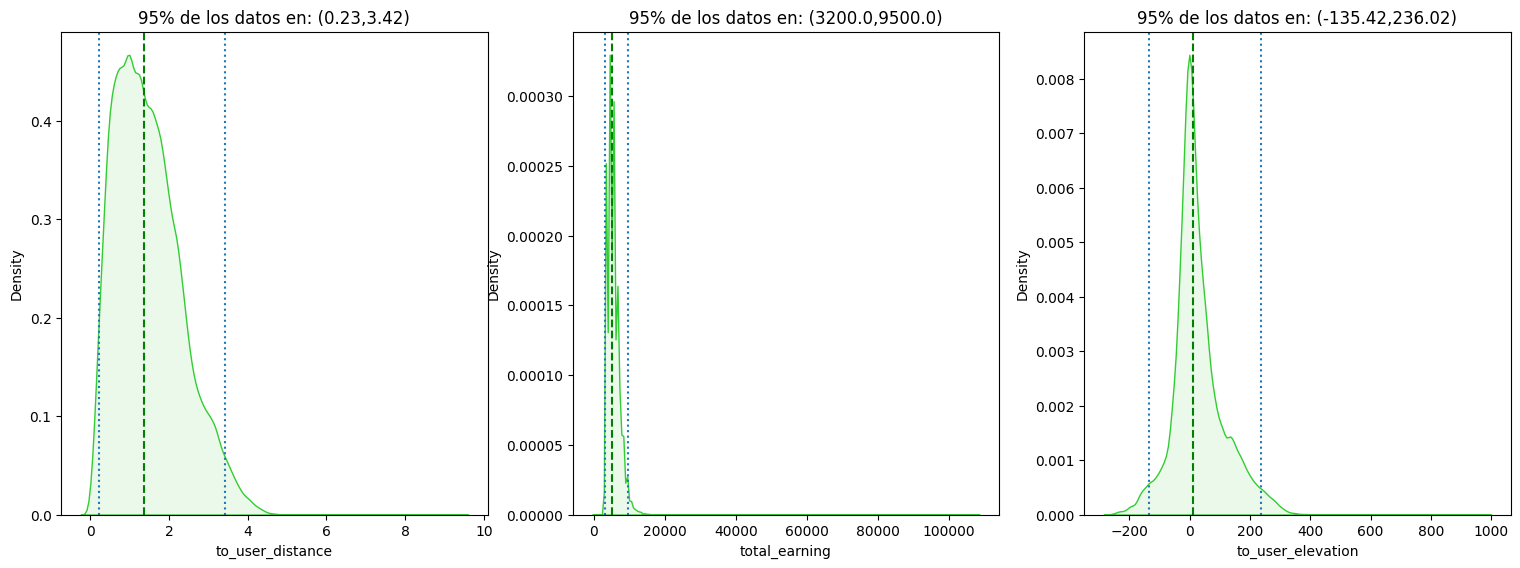

In [85]:

fig, axs = plt.subplots(ncols=3)
for i in [2,3,4]:
    quantiles = np.quantile(dataset[dataset.columns[i]], q=(0.025, 0.975, 0.5))
    ax = sns.kdeplot(x = dataset[dataset.columns[i]], fill = True, color = "limegreen", alpha = 0.1, ax=axs[2-i])
    ax.axvline(x = quantiles[0], ymin = 0, ymax = 1, linestyle = ':')
    ax.axvline(x = quantiles[1], ymin = 0, ymax = 1, linestyle = ':')
    ax.axvline(x = quantiles[2], ymin = 0, ymax = 1, color = 'green', linestyle = '--')
    ax.set(title = '95% de los datos en: ({0},{1})'.format(round(quantiles[0], 2), round(quantiles[1],2)))
    

La distancia de la tienda al usuario está entre 0 y 9.36 kilómetros, destacando que el 95% de los usuarios se encuentra entre 0.23 y 3.42 kilómetros, por lo que rara vez los pedidos están más allá de los 4 km y el promedio de la distancia es de 1.47 km. En cuanto a las ganancias, el 95% de las ganancias por pedido de los couriers está entre los 3200 y los 9500 pesos, dónde rara vez la ganancia está por encima de los 10000 pesos por pedido con un promedio de 5374 pesos de ganancia. La elevación de los usuarios con respecto a la tienda varía entre -135.42 metros y 236.02 metros, con un promedio de 27 metros de diferencia; este item presenta la mayor cantidad de observaciones por encima y por debajo del promedio y el 95% de los datos, además que es el único donde el valor de la desviación estándar es mayor al valor promedio de los datos.

In [86]:
non_taken_df = dataset.loc[dataset['taken']==0,:]
non_taken_df.describe()

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,taken
count,9.689000e+03,9.689000e+03,9689.000000,9689.000000,9689.000000,9689.0
mean,1.507970e+07,7.706063e+08,1.730976,23.672238,5084.823614,0.0
std,4.854365e+05,3.094613e+08,0.843599,89.789034,1896.889515,0.0
min,1.421081e+07,3.000000e+07,0.000000,-259.170288,200.000000,0.0
25%,1.465504e+07,9.000051e+08,1.094629,-25.133667,3600.000000,0.0
50%,1.508213e+07,9.000089e+08,1.689055,9.335571,4700.000000,0.0
75%,1.554548e+07,9.000131e+08,2.270345,63.798584,6000.000000,0.0
max,1.590252e+07,9.000173e+08,4.670187,475.685425,18700.000000,0.0


El total de órdenes que no son tomadas por ningún courier es de 9689.

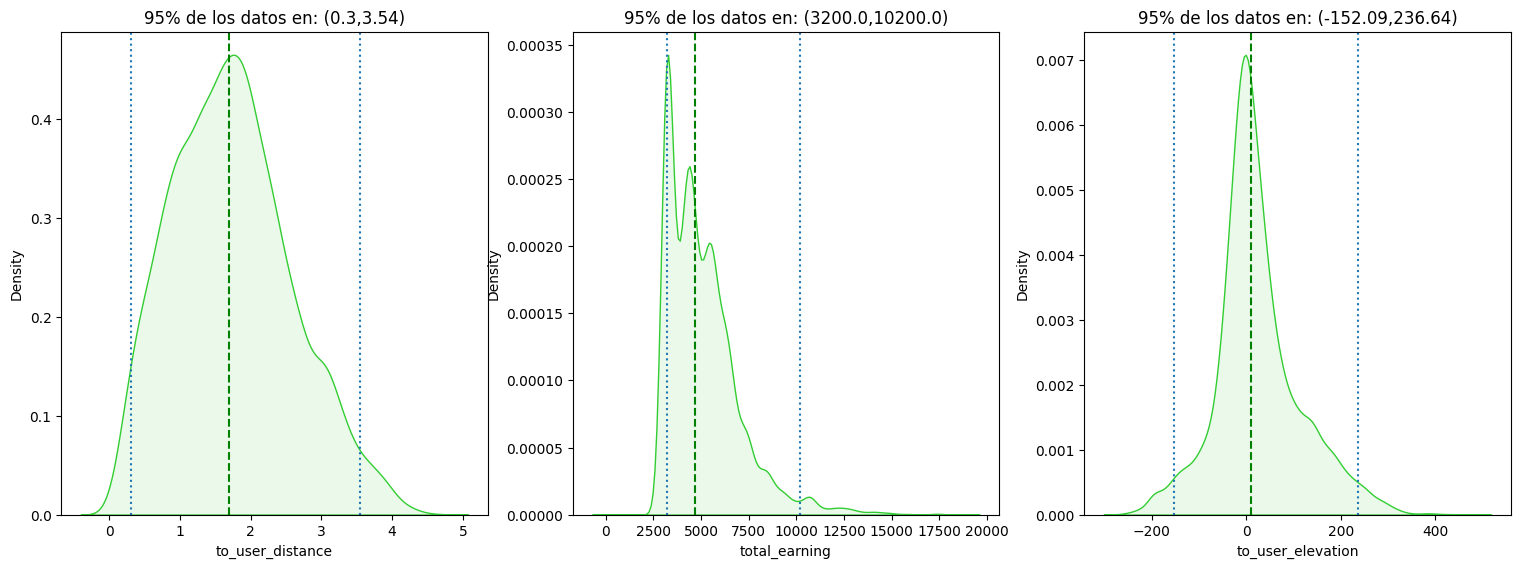

In [87]:


fig, axs = plt.subplots(ncols=3)
for i in [2,3,4]:
    quantiles = np.quantile(non_taken_df[non_taken_df.columns[i]], q=(0.025, 0.975, 0.5))
    ax = sns.kdeplot(x = non_taken_df[non_taken_df.columns[i]], fill = True, color = "limegreen", alpha = 0.1, ax=axs[2-i])
    ax.axvline(x = quantiles[0], ymin = 0, ymax = 1, linestyle = ':')
    ax.axvline(x = quantiles[1], ymin = 0, ymax = 1, linestyle = ':')
    ax.axvline(x = quantiles[2], ymin = 0, ymax = 1, color = 'green', linestyle = '--')
    ax.set(title = '95% de los datos en: ({0},{1})'.format(round(quantiles[0], 2), round(quantiles[1],2)))

Al analizar sólamente los casos donde no se toman las órdenes por los courier, no se ve una diferencia tan importante a nivel del 95% de los datos observados totales, salvo en el item de ganancia total donde el 97.5% de los registros están un poco por encima de los pedidos tomados; sin embargo, el promedio de ganancia está en los 5083 pesos, ligeramente por debajo de la totalidad de las observaciones lo que indicaría que suelen rechazarse pedidos cuando la ganancia es menor. 

#### Coeficiente de Variación.

Se usa para medir la variabilidad de un conjunto de datos dado. A pesar de que es una medida adimensional, es útil para relacionar la desviación estándar con el tamaño de la media. Se expresa como: 

$$C_v = \frac{\sigma}{\overline{x}}$$

In [88]:
# Coeficientes de variación para las variables numéricas
def coef_variacion(serie):
    return(round(np.std(serie) / np.mean(serie)*100, 2))

for i in [2,3,4]:
    print('Coeficiente de variación de {0}: {1}%'.format(dataset.columns[i], coef_variacion(dataset[dataset.columns[i]])))


Coeficiente de variación de to_user_distance: 57.34%
Coeficiente de variación de to_user_elevation: 309.9%
Coeficiente de variación de total_earning: 33.21%


En este caso, la elevación en metros entre la tienda y el usuario, es la variable con mayor variabilidad del conjunto de datos, por lo que será necesario reprocesar los datos antes de aplicar cualquier tipo de metodología estadística con el fin de identificar las causas de que una orden no sea aceptada.

### 2. Análisis por unidad temporal

In [89]:
def morning_time(x):
    if x >= 23 or 0<= x <= 2:
        result = 'Midnight'
    elif x >=19:
        result = 'Night'
    elif x >= 16: 
        result = 'Evening'
    elif x >= 12:
        result = 'Afternoon'
    elif x >= 7: 
        result = 'Morning'
    else:
        result = 'Early morning'
    return(result)


dataset['day'] = dataset['created_at'].dt.dayofweek
# Day of week toma cómo 0 el día lunes

dataset['hour'] = dataset['created_at'].dt.hour
dataset['daytime'] = dataset['hour'].apply(morning_time)
non_taken_df = dataset.loc[dataset['taken']==0,:]

#### Análisis por hora del día

<Axes: xlabel='hour', ylabel='order_id'>

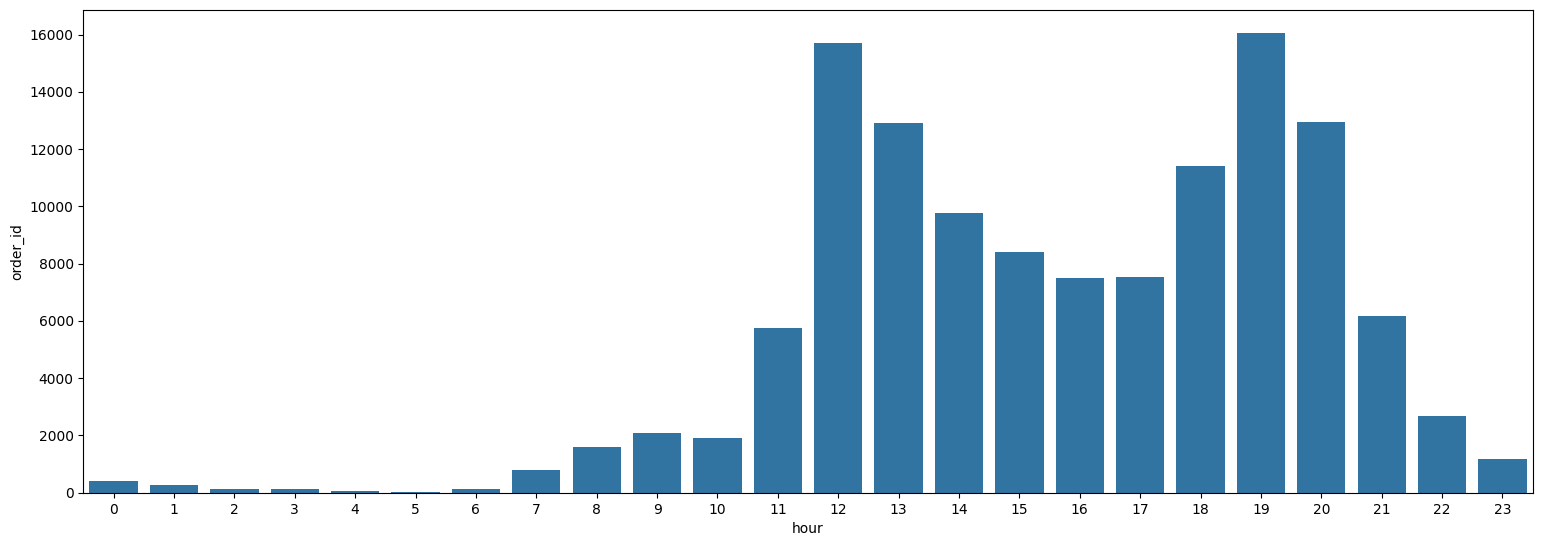

In [90]:
hour_analysis = dataset.groupby(['hour', 'daytime'])[['order_id']].count().reset_index()
sns.barplot(x = 'hour', y = 'order_id', data = hour_analysis)

No es de sorprender ver los picos de órdenes creadas en la hora de almuerzo y la hora de la cena con picos entre las 12 y las 13 horas, y picos entre las 18 y las 20 horas con un nivel relativamente constante entre las 14 y las 17 horas. Las órdenes caen al mínimo entre las 23 y las 7 horas. 

([<matplotlib.patches.Wedge at 0x244678e08b0>,
 [Text(0.4286670301507566, 1.0130373029961586, 'Afternoon'),
  Text(-0.7724908157651366, 0.7831078722363312, 'Early morning'),
  Text(-1.0918425203683157, 0.13371578334573728, 'Evening'),
  Text(-0.9140264041374045, -0.6120095853331435, 'Midnight'),
  Text(-0.6449526763289992, -0.8910870020913005, 'Morning'),
  Text(0.643011315291704, -0.8924889066015516, 'Night')],
 [Text(0.23381838008223083, 0.5525658016342682, '37%'),
  Text(-0.4213586267809835, 0.4271497484925442, '0%'),
  Text(-0.5955504656554449, 0.0729358818249476, '21%'),
  Text(-0.4985598568022206, -0.33382341018171463, '2%'),
  Text(-0.35179236890672677, -0.48604745568616387, '10%'),
  Text(0.3507334447045658, -0.4868121308735735, '30%')])

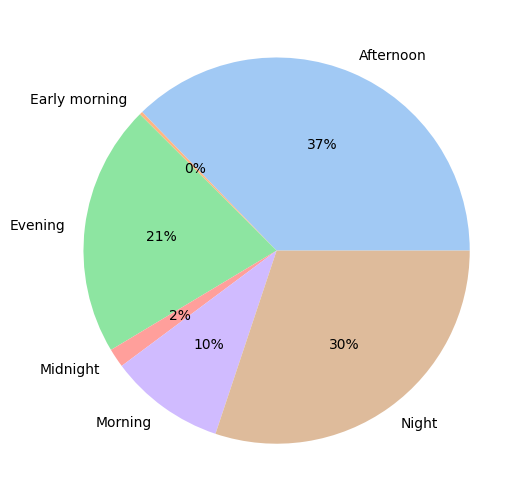

In [91]:
daytime_analysis = dataset.groupby(['daytime'])[['order_id']].count().reset_index()
plt.pie(daytime_analysis['order_id'], labels = daytime_analysis['daytime'], colors = sns.color_palette('pastel'), autopct='%.0f%%')

Las órdenes creadas se centran principalmente en las franjas horarias de "Afternoon" definida entre las 12 y las 17 horas, "Evening" definida entre las 17 y las 20 horas y "Night" entre las 20 y 23 horas. Esto denota un comportamiento de consumo centrado en las horas de la tarde / noche por lo que se tiene que tener en cuenta que sólo un 10% de las órdenes totales son hechas entre las 7 y las 11 horas.

<Axes: xlabel='hour', ylabel='order_id'>

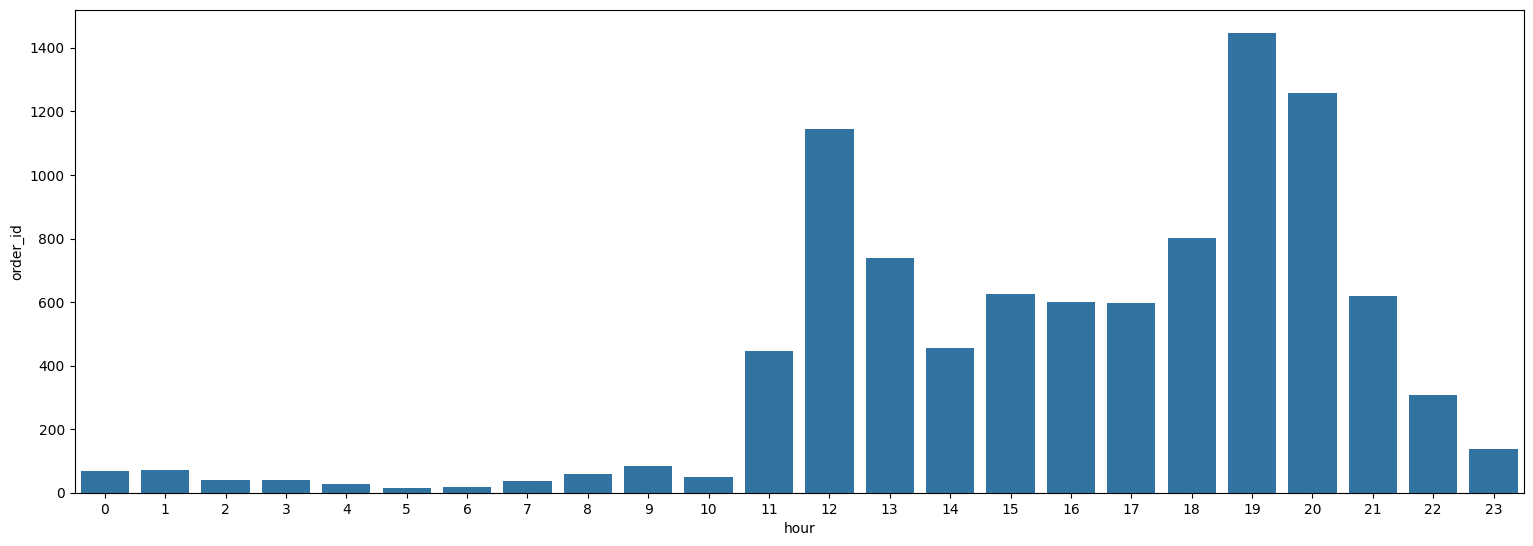

In [92]:
non_taken_hour_analysis = non_taken_df.groupby(['hour', 'daytime'])[['order_id']].count().reset_index()
sns.barplot(x = 'hour', y = 'order_id', data = non_taken_hour_analysis)

Las órdenes no tomadas tienen una distribución similar al número total de órdenes, sin embargo se toman menos en las horas de tarde/noche que en las horas de la mañana.

([<matplotlib.patches.Wedge at 0x2446750ac10>,
 [Text(0.6305038454217695, 0.9013683491827087, 'Afternoon'),
  Text(-0.4098470081010973, 1.020796468425797, 'Early morning'),
  Text(-0.9605223426248771, 0.5360940489488931, 'Evening'),
  Text(-1.0675482886521843, -0.2652181204137314, 'Midnight'),
  Text(-0.92819072241066, -0.5903066854024076, 'Morning'),
  Text(0.4207458686803302, -1.0163527507654193, 'Night')],
 [Text(0.34391118841187424, 0.4916554631905683, '31%'),
  Text(-0.22355291350968942, 0.5567980736867983, '1%'),
  Text(-0.5239212777953874, 0.2924149357903053, '21%'),
  Text(-0.582299066537555, -0.14466442931658072, '3%'),
  Text(-0.5062858485876327, -0.3219854647649496, '7%'),
  Text(0.22949774655290736, -0.5543742276902286, '38%')])

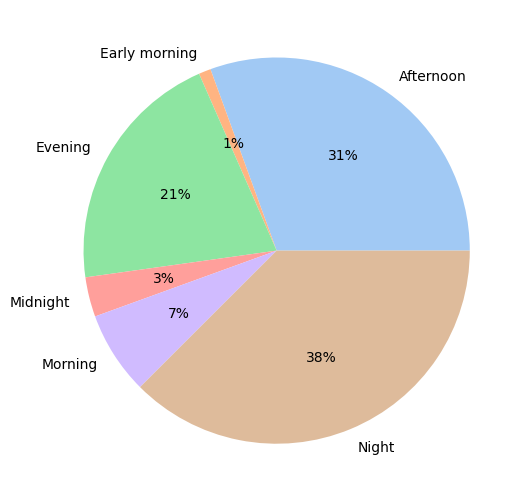

In [93]:
non_taken_daytime_analysis = non_taken_df.groupby(['daytime'])[['order_id']].count().reset_index()
plt.pie(non_taken_daytime_analysis['order_id'], labels = non_taken_daytime_analysis['daytime'], colors = sns.color_palette('pastel'), autopct='%.0f%%')

Los porcentajes en las órdenes no tomadas aumentan en horas de la noche y disminuyen en horas de la mañana y la tarde. Una primera hipótesis es que la hora del día podría influir a la hora de que un courier acepte o no una orden.

<Axes: xlabel='daytime'>

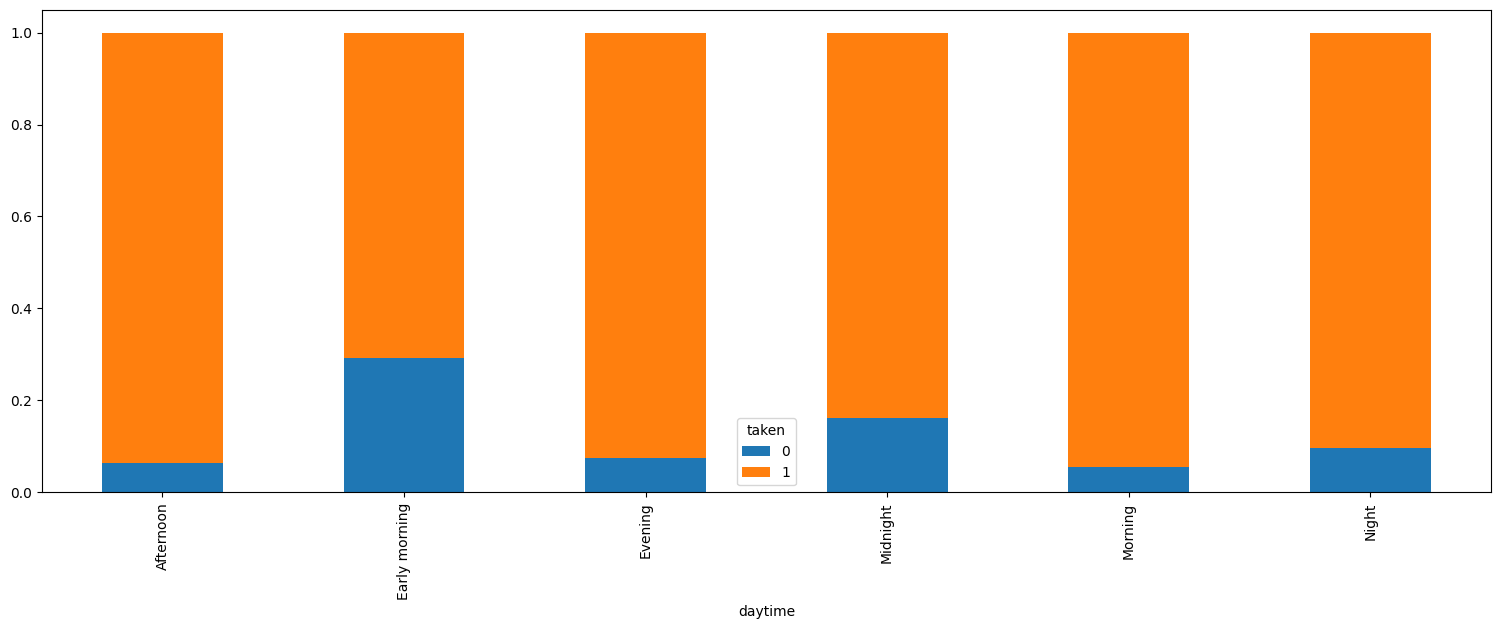

In [94]:
non_taken_group_daytime = dataset.groupby(['daytime', 'taken'])[['order_id']].count() / dataset.groupby(['daytime'])[['order_id']].count()
non_taken_group_daytime.reset_index().pivot_table(index = 'daytime', values = 'order_id', columns = 'taken').plot(kind = 'bar', stacked=True)

<Axes: xlabel='daytime'>

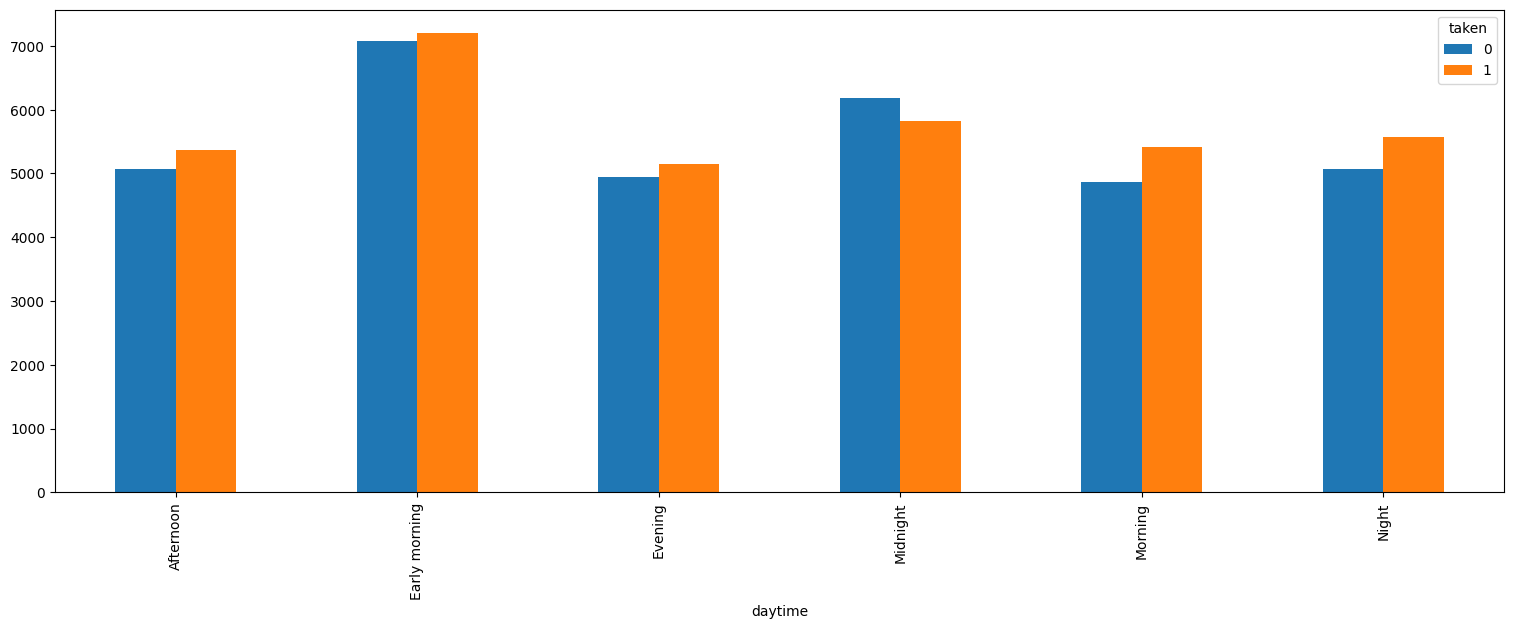

In [95]:
dataset.groupby(['daytime', 'taken'])[['total_earning']].mean().reset_index().pivot_table(index = 'daytime', values = 'total_earning', columns = 'taken').plot(kind = 'bar', stacked=False)

La hora del día en la que menos se aceptan pedidos es en la madrugada, seguida de la media noche y la noche. Se rechazan menos pedidos en la mañana que en las horas del final de la tarde. Las ganancias totales del courier no son, a priori, un factor diferencial a la hora de tomar o no un pedido. 

#### Análisis por día de la semana

<Axes: xlabel='day', ylabel='order_id'>

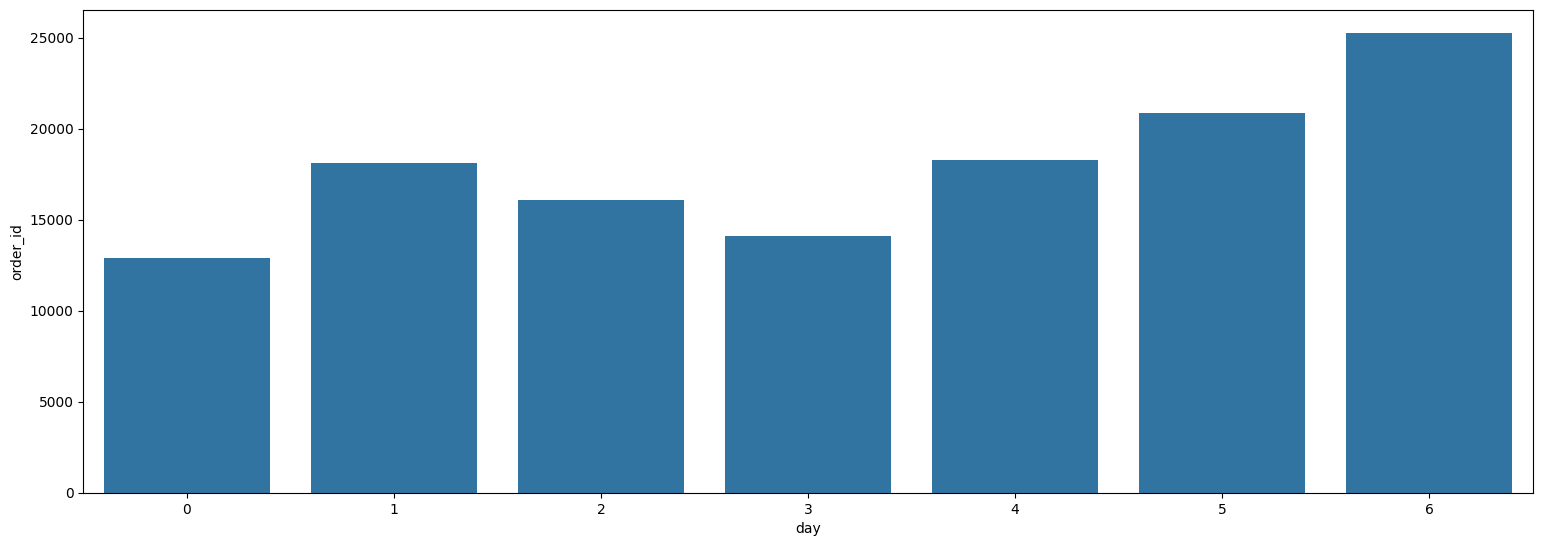

In [96]:
day_analysis = dataset.groupby(['day'])[['order_id']].count().reset_index()
sns.barplot(x = 'day', y = 'order_id', data = day_analysis)

Los fines de semana definidos como viernes, sábado y domingo; y los martes son los días con más pedidos realizados. Los lunes son el día con menos pedidos realizados en la plataforma.

<Axes: xlabel='day', ylabel='order_id'>

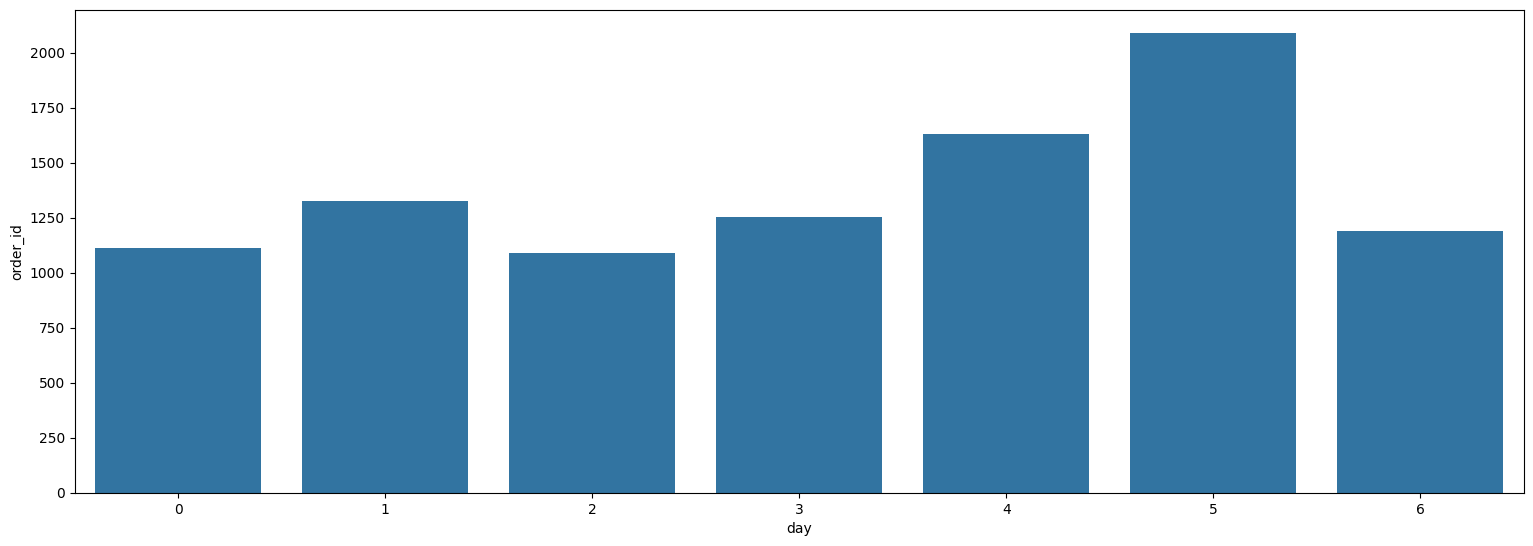

In [97]:
non_taken_day_analysis = non_taken_df.groupby(['day'])[['order_id']].count().reset_index()
sns.barplot(x = 'day', y = 'order_id', data = non_taken_day_analysis)

Sin embargo los días en los que menos se aceptan pedidos por parte de los courier son los sábados y los viernes. Casualmente, son los días con mayor actividad nocturna de la semana, contrastando directamente con que los pedidos más rechazados por franja horaria suelen ser en horas de la madrugada / noche. Los martes también se suelen rechazar más pedidos de lo habitual.

<Axes: xlabel='day'>

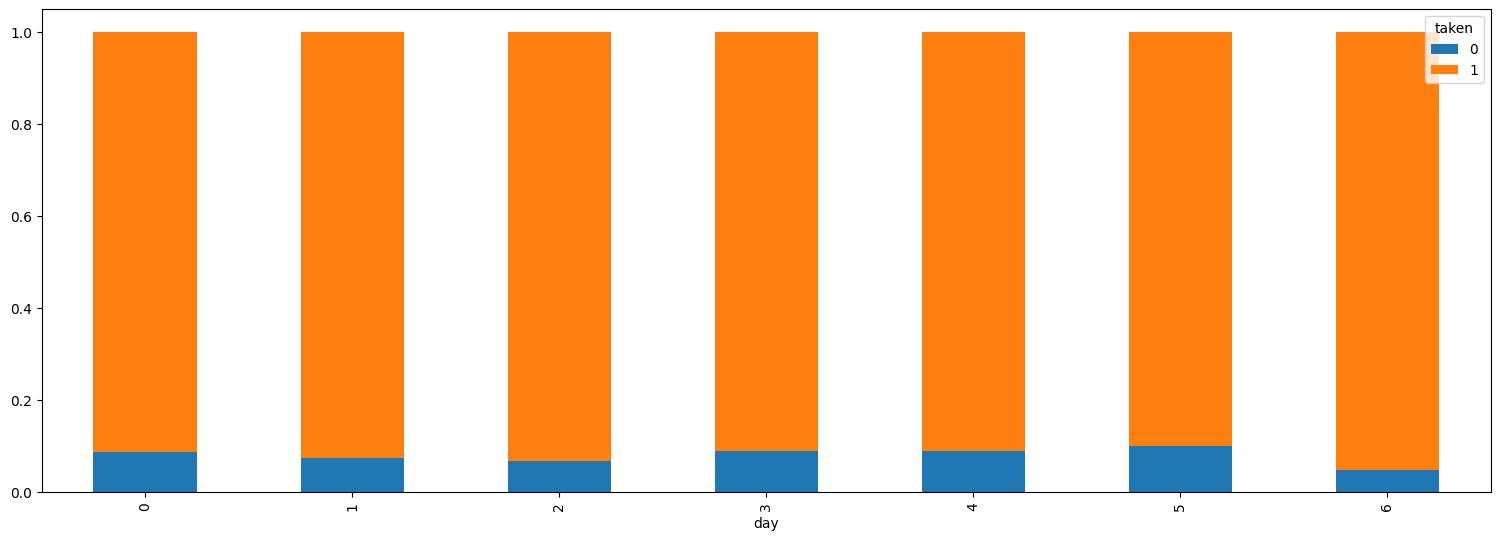

In [98]:
aux = dataset.groupby(['day', 'taken'])[['order_id']].count() / dataset.groupby(['day'])[['order_id']].count()
aux.reset_index().pivot_table(index = 'day', values = 'order_id', columns = 'taken').plot(kind = 'bar', stacked=True)

In [99]:
aux.reset_index().pivot_table(index = 'day', values = 'order_id', columns = 'taken')

taken,0,1
day,,
0,0.086366,0.913634
1,0.073157,0.926843
2,0.067870,0.932130
3,0.088769,0.911231
4,0.089295,0.910705
5,0.100081,0.899919
6,0.047104,0.952896


<Axes: xlabel='day'>

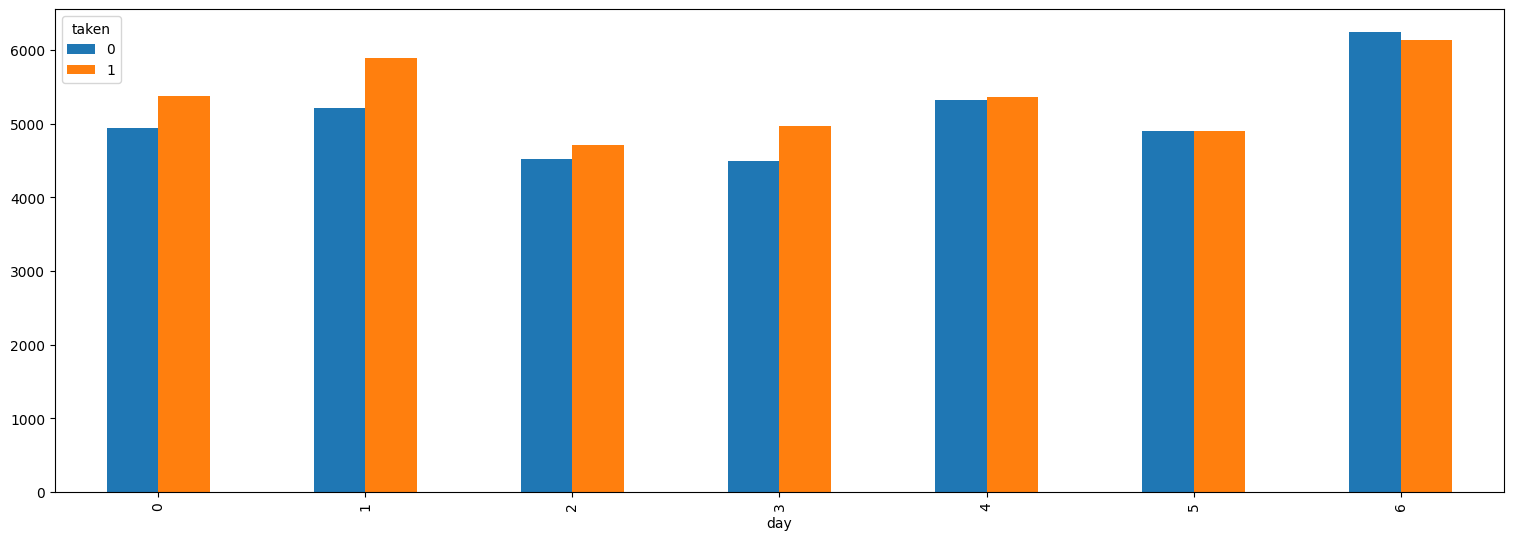

In [100]:
dataset.groupby(['day', 'taken'])[['total_earning']].mean().reset_index().pivot_table(index = 'day', values = 'total_earning', columns = 'taken').plot(kind = 'bar', stacked=False)

Tampoco se ve que haya una diferencia significativa a priori entre los promedios de ganancias de las órdenes tomadas y las órdenes no tomadas en los días de la semana, pero es notable que el día martes sí hay una diferencia importante entre las ganancias de los pedidos no tomados y pedidos tomados. 

### 3. Análisis estadístico

#### Análisis de Correlación

In [101]:
dataset.iloc[:,[2,3,4]].corr(method='kendall')

,to_user_distance,to_user_elevation,total_earning
to_user_distance,1.000000,0.093507,0.131557
to_user_elevation,0.093507,1.000000,0.062477
total_earning,0.131557,0.062477,1.000000


In [102]:
dataset.loc[dataset['taken'] == 0, :].iloc[:,[2,3,4]].corr(method='kendall')

,to_user_distance,to_user_elevation,total_earning
to_user_distance,1.000000,0.062622,0.162059
to_user_elevation,0.062622,1.000000,0.020032
total_earning,0.162059,0.020032,1.000000


Haciendo uso del coeficiente de correlación rankeado de Kendall, se encuentra que existe cierta relación entre las ganancias totales y la distancia del usuario. Sin embargo, esta relación es apenas notable, a pesar de que incrementa levemente cuando se analiza sólamente las órdenes que no fueron tomadas por algún courier. 

#### Prueba de diferencias de medias

In [103]:
ttest_ind(a = dataset.loc[dataset['taken'] == 0, 'total_earning'], 
          b = dataset.loc[dataset['taken'] == 1, 'total_earning'], 
          equal_var= False, alternative='less')

Ttest_indResult(statistic=-15.714357933826776, pvalue=2.3452858589490213e-55)

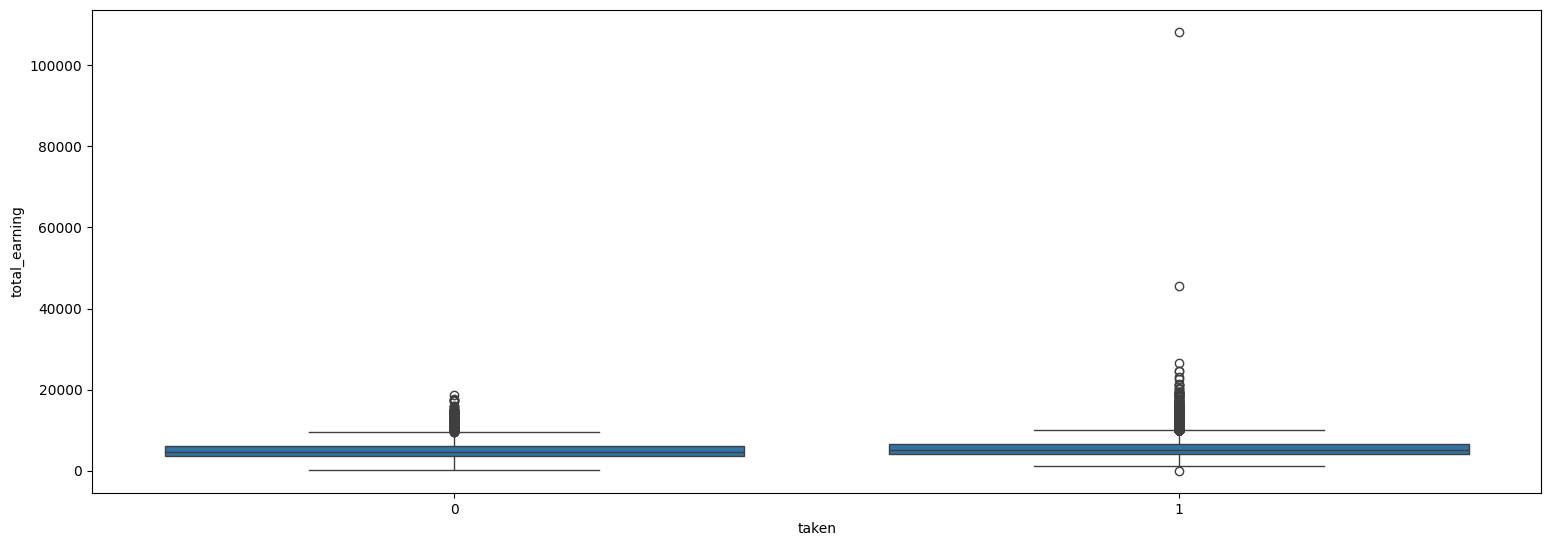

In [104]:
ax = sns.boxplot(x = 'taken', y = 'total_earning', data = dataset)

Para la diferencia de medias en el ingreso total del courier entre órdenes tomadas y no tomadas, se rechaza la hipótesis nula con fuerte evidencia de que las órdenes tomadas tienen un menor ingreso total promedio. Esto quiere decir que las órdenes que no son tomadas, tienen una ganancia total para el courier estadísticamente inferior a las órdenes tomadas mostrando clara evidencia de que probablemente las órdenes no sean tomadas debido a una ganancia total inferior. 

In [105]:
ttest_ind(a = dataset.loc[dataset['taken'] == 0, 'to_user_distance'], 
          b = dataset.loc[dataset['taken'] == 1, 'to_user_distance'],
          equal_var=False, alternative='less')

Ttest_indResult(statistic=30.8891148034078, pvalue=1.0)

En el caso de la distancia total al usuario, se evidencia que las órdenes que no son tomadas, en promedio tienen una distancia mayor a las órdenes que son tomadas. Esto con fuerte evidencia estadística que muestra que probablemente un courier prefiera no tomar una orden sí el usuario está muy lejos del destino.

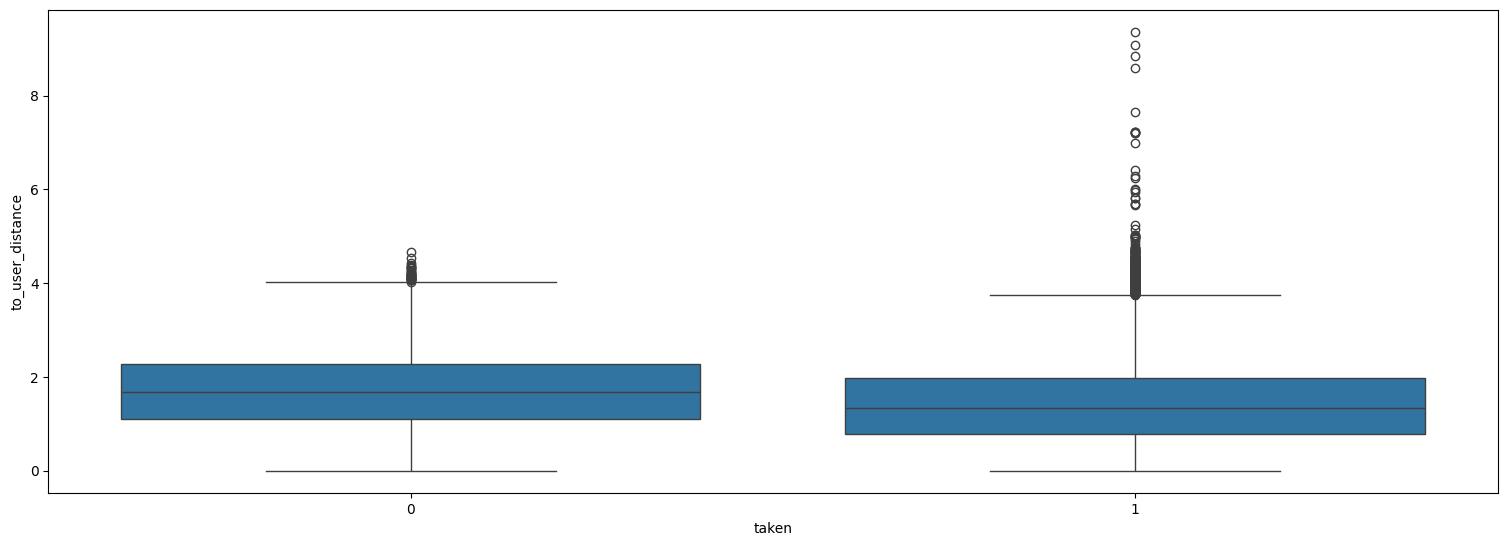

In [106]:
ax = sns.boxplot(x = 'taken', y = 'to_user_distance', data = dataset)

In [107]:
ttest_ind(a = dataset.loc[dataset['taken'] == 0, 'to_user_elevation'], 
          b = dataset.loc[dataset['taken'] == 1, 'to_user_elevation'],
          equal_var=False, alternative='less')

Ttest_indResult(statistic=-4.238782268114252, pvalue=1.1327119990591109e-05)

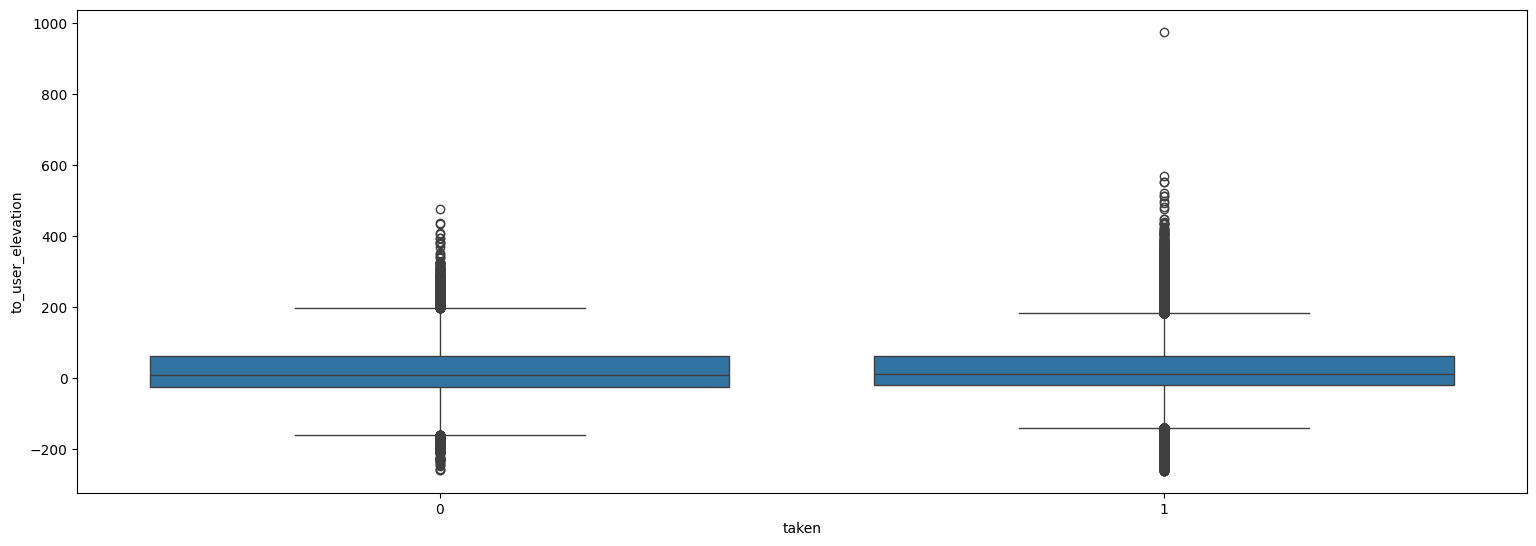

In [108]:
ax = sns.boxplot(x = 'taken', y = 'to_user_elevation', data = dataset)

Finalmente, la prueba estadística muestra que los pedidos no aceptados tienen una menor altitud entre el usuario y el comercio que los pedidos aceptados. Sin embargo no hay mucho que podamos inferir de esta prueba.

## Parte 2: Modelación

In [109]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel


# Clasificación vía árboles (no lineal)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
# Clasificación vía regresión logística (lineal)
from sklearn.linear_model import LogisticRegression
# Clasificación vía naive bayes (independencia lineal)
from sklearn.naive_bayes import BernoulliNB
# Clasificación vía SVM (independencia lineal, discriminante lineal)
from sklearn.svm import LinearSVC
# Clasificación vía XGB
from sklearn.ensemble import GradientBoostingClassifier

# Revisión de modelos
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_auc_score


### 1. Preparar el dataset

Es importante configurar el dataset, ya que la clase que nos importa, está sub-representada en el conjunto de datos. Por ende, se procederá a hacer un rebalanceo basándonos en *under-sampling* de manera que la clase que está sobrerepresentada será muestreada aleatoriamente, mientras que la clase sub-representada se mantendrá estática. La ventaja es que nos permitirá tener mejores resultados en los modelos, sin embargo, existe el riesgo de que información valiosa se pierda. Para evitar esto, se crean 5 datasets aleatorios tomados de los registros de la clase sobrerepresentada con sus respectivos estados aleatorios (para reproducibilidad).

In [110]:
dataset.taken.value_counts()

taken
1    115860
0      9689
Name: count, dtype: int64

In [111]:
dataset

,order_id,store_id,to_user_distance,to_user_elevation,total_earning,created_at,taken,day,hour,daytime
0,14364873,30000009,2.478101,-72.719360,4200.0,2017-09-07 20:02:17+00:00,0,3,20,Night
1,14370123,30000058,0.451711,37.754761,4200.0,2017-09-07 20:13:16+00:00,0,3,20,Night
2,14368534,900003684,2.026072,207.191162,4000.0,2017-09-07 20:07:23+00:00,0,3,20,Night
3,14369923,900014085,0.965496,117.429199,3450.0,2017-09-07 20:12:14+00:00,1,3,20,Night
4,14367859,900004363,0.577156,-7.895874,5200.0,2017-09-07 20:13:16+00:00,1,3,20,Night
...,...,...,...,...,...,...,...,...,...,...
125544,15650722,900005635,1.503389,86.380493,6350.0,2017-09-30 16:20:01+00:00,1,5,16,Evening
125545,15651534,900005727,2.442553,289.788574,4450.0,2017-09-30 16:26:01+00:00,1,5,16,Evening
125546,15651511,900010396,0.094488,0.094238,5200.0,2017-09-30 16:26:01+00:00,1,5,16,Evening
125547,15651572,30000322,2.119052,183.751465,3700.0,2017-09-30 16:27:00+00:00,1,5,16,Evening


In [112]:
dataset_taken_0 = dataset.loc[dataset['taken']==0,:].iloc[:,[6,2,3,4,7,8]]
dataset_taken_1 = dataset.loc[dataset['taken']!=0,:].iloc[:,[6,2,3,4,7,8]]

dataset_taken_1_und = []

for i in range(4):
    dataset_taken_1_und.append(dataset_taken_1.sample(n = 9689, replace=False, random_state=i))

In [113]:
dataset_modelling = []

for i in range(4): 
    dataset_modelling.append(pd.concat([dataset_taken_0, dataset_taken_1_und[i]]))

In [114]:
dataset_modelling_original = dataset_modelling.copy()

#### Escalar la data continua

In [115]:
scaler = StandardScaler()

for i in range(4):
    dataset_modelling[i].iloc[:,[1,2,3]] = pd.DataFrame(np.asmatrix(scaler.fit_transform(dataset_modelling[i].iloc[:,[1,2,3]])))

# scaler.inverse_transform(x) para desescalar la data

#### Convertir en dummys todas las variables categóricas

In [116]:
one_hot = OneHotEncoder(sparse_output=False, drop='first')

for i in range(4):
    cat_X = one_hot.fit_transform(dataset_modelling[i][['day', 'hour']])
    
    cat_X_aux = pd.DataFrame(np.asmatrix(cat_X), index = dataset_modelling[i].index)
    cat_X_aux.columns = one_hot.get_feature_names_out()

    dataset_modelling[i] = pd.concat([dataset_modelling[i].drop(['day', 'hour'], axis = 1), cat_X_aux], axis=1)


#### Partición train / test

In [117]:
X_train_list, X_test_list, y_train_list, y_test_list = [], [], [], []

for i in range(4):
    X_train_aux, X_test_aux, y_train_aux, y_test_aux = train_test_split(dataset_modelling[i].iloc[:,1:], 
                                                                        dataset_modelling[i].iloc[:,0], 
                                                                        train_size=0.7,
                                                                        random_state=2314+i)
    X_train_list.append(X_train_aux)
    X_test_list.append(X_test_aux)
    y_train_list.append(y_train_aux)
    y_test_list.append(y_test_aux)


### 2. Establecimiento de Pipelines y parámetros

In [118]:
class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [119]:
models = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'NaiveBayes': BernoulliNB(),    
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'LinearSVC': LinearSVC()
}

In [120]:
parameters = {
    'ExtraTreesClassifier':{'n_estimators':[50,100], 'max_depth':[4,8,12], 'random_state':[1234]},
    'RandomForest':{'n_estimators':[50, 100], 'max_depth':[4,8,12], 'random_state':[1234]},
    'LogisticRegression':{'fit_intercept':[True, False], 'solver':['lbfgs', 'newton-cholesky', 'sag'], 'random_state':[1234]},
    'NaiveBayes':{'fit_prior':[True, False]},
    'GradientBoostingClassifier':{'n_estimators':[32, 64, 100], 'learning_rate':[0.5, 0.75, 1.0],'random_state':[1234]},
    'LinearSVC':{'fit_intercept':[True, False], 'loss':['hinge', 'squared_hinge'],'random_state':[1234]}
}

### 3. Ejecución (Tiempo estimado: 5m 24s)

In [121]:
helper1 = EstimatorSelectionHelper(models, parameters)
results = []

for i in range(4):
    for j in ['roc_auc', 'f1', 'accuracy', 'precision', 'recall']:
        helper1.fit(X_train_list[i], y_train_list[i], scoring=j, n_jobs=4)
        aux = helper1.score_summary(sort_by='max_score')
        aux['metric'] = j
        aux['dataset'] = i
        results.append(aux)


Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Running GridSearchCV for RandomForest.
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Running GridSearchCV for NaiveBayes.
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 9 candidates, totalling 27 fits
Running GridSearchCV for LinearSVC.
Fitting 3 folds for each of 4 candidates, totalling 12 fits
ExtraTreesClassifier
RandomForest
LogisticRegression
NaiveBayes
GradientBoostingClassifier
LinearSVC
Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Running GridSearchCV for RandomForest.
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 6 ca

In [122]:
results = pd.concat(results)


In [123]:
aux = results


In [124]:
aux.columns[[0,5,6,7,8,9,10,11,12,14]]

Index(['estimator', 'max_depth', 'n_estimators', 'random_state',
       'fit_intercept', 'solver', 'fit_prior', 'learning_rate', 'loss',
       'dataset'],
      dtype='object')

In [125]:
aux['key'] = aux[aux.columns[[0,5,6,7,8,9,10,11,12]]].apply(
    lambda x: '_'.join(x.dropna().astype(str)),
    axis=1
)
aux

,estimator,min_score,mean_score,max_score,std_score,max_depth,n_estimators,random_state,fit_intercept,solver,fit_prior,learning_rate,loss,metric,dataset,key
21,GradientBoostingClassifier,0.699434,0.703947,0.707471,0.003355,NaN,64,1234,NaN,NaN,NaN,0.5,NaN,roc_auc,0,GradientBoostingClassifier_64_1234_0.5
20,GradientBoostingClassifier,0.705359,0.70573,0.70605,0.000284,NaN,32,1234,NaN,NaN,NaN,0.5,NaN,roc_auc,0,GradientBoostingClassifier_32_1234_0.5
22,GradientBoostingClassifier,0.694976,0.701558,0.705197,0.004663,NaN,100,1234,NaN,NaN,NaN,0.5,NaN,roc_auc,0,GradientBoostingClassifier_100_1234_0.5
23,GradientBoostingClassifier,0.695375,0.701363,0.70492,0.004259,NaN,32,1234,NaN,NaN,NaN,0.75,NaN,roc_auc,0,GradientBoostingClassifier_32_1234_0.75
24,GradientBoostingClassifier,0.687977,0.695458,0.700889,0.005467,NaN,64,1234,NaN,NaN,NaN,0.75,NaN,roc_auc,0,GradientBoostingClassifier_64_1234_0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,ExtraTreesClassifier,0.495996,0.513493,0.524021,0.012457,12,50,1234,NaN,NaN,NaN,NaN,NaN,recall,3,ExtraTreesClassifier_12_50_1234
3,ExtraTreesClassifier,0.469751,0.495552,0.508897,0.018247,8,100,1234,NaN,NaN,NaN,NaN,NaN,recall,3,ExtraTreesClassifier_8_100_1234
2,ExtraTreesClassifier,0.449733,0.48013,0.50089,0.021968,8,50,1234,NaN,NaN,NaN,NaN,NaN,recall,3,ExtraTreesClassifier_8_50_1234
1,ExtraTreesClassifier,0.409253,0.421263,0.428381,0.008541,4,100,1234,NaN,NaN,NaN,NaN,NaN,recall,3,ExtraTreesClassifier_4_100_1234


In [126]:
aux.pivot_table(index = 'key', 
                columns = 'metric',
                values = 'max_score', 
                aggfunc=np.mean).sort_values('roc_auc', ascending=False)

metric,accuracy,f1,precision,recall,roc_auc
key,,,,,
GradientBoostingClassifier_32_1234_0.5,0.657045,0.658935,0.654903,0.666793,0.707792
GradientBoostingClassifier_32_1234_0.75,0.656677,0.660459,0.653066,0.67021,0.705682
GradientBoostingClassifier_64_1234_0.5,0.656271,0.658646,0.653458,0.667919,0.704813
GradientBoostingClassifier_100_1234_0.5,0.651313,0.655167,0.649477,0.66553,0.70076
GradientBoostingClassifier_64_1234_0.75,0.649212,0.653751,0.644762,0.663826,0.697242
GradientBoostingClassifier_32_1234_1.0,0.647921,0.652358,0.646806,0.664573,0.695075
RandomForest_12_100_1234,0.642119,0.640423,0.644935,0.638574,0.69279
RandomForest_12_50_1234,0.64328,0.63869,0.646485,0.636049,0.691277
GradientBoostingClassifier_100_1234_0.75,0.642004,0.64544,0.63938,0.653431,0.689476


A través de los modelos y distintas configuraciones probadas, junto con los diferentes remuestreos del dataset original, se concluye que el modelo que mejor desempeño tiene es el Gradient Boost Classifier con un número de estimadores de 32 y una tasa de aprendizaje de 0.5. Este modelo se usará para evaluar las métricas en la partición de testeo y analizar más a fondo los resultados. 

### 4. Modelo establecido

In [127]:
final_models, y_predicted = [], []
# final_statistics = []
list_f1, list_acc, list_prec, list_recall, list_roc = [], [], [], [], []

for i in range(4):
    aux = GradientBoostingClassifier(n_estimators=32, random_state=1234, learning_rate=0.5).fit(X_train_list[i], y_train_list[i])
    final_models.append(aux) 
    aux_2 = aux.predict(X_test_list[i])
    y_predicted.append(np.append(aux.predict(X_train_list[i]), aux.predict(X_test_list[i])))
    list_f1.append(f1_score(y_test_list[i], aux_2))
    list_acc.append(accuracy_score(y_test_list[i], aux_2))
    list_prec.append(precision_score(y_test_list[i], aux_2))
    list_recall.append(recall_score(y_test_list[i], aux_2))
    list_roc.append(roc_auc_score(y_test_list[i], aux_2))


In [128]:
results_indexed, dataset_results = [], []

for i in range(4):
    results_indexed.append(pd.DataFrame({'Indx': np.append(y_train_list[i].index, y_test_list[i].index),
                                    'Real': np.append(y_train_list[i], y_test_list[i]),
                                    'Pred': y_predicted[i]}, index=np.append(y_train_list[i].index, y_test_list[i].index)))
    dataset_results.append(pd.merge(results_indexed[i].sort_index(), dataset_modelling_original[i].sort_index(), right_index=True, left_index=True))
    
    
# y_predicted[0]
# f1_score(results_indexed['Real'], results_indexed['Pred'])

In [129]:
final_statistics = pd.DataFrame.from_dict({'accuracy':list_acc, 
                                           'f1 score': list_f1, 
                                           'precision': list_prec,
                                           'recall':list_recall,
                                           'roc auc': list_roc})
final_statistics

,accuracy,f1 score,precision,recall,roc auc
0,0.647403,0.651716,0.649289,0.654161,0.647344
1,0.646199,0.651651,0.638566,0.665284,0.646297
2,0.653423,0.652286,0.649931,0.654659,0.653431
3,0.644479,0.651727,0.646823,0.656706,0.644317


Ya que el modelo no se ajusta por medio de validación cruzada, se pierden algunos puntos en los estadísticos de ROC - AUC. Sin embargo, se puede ver que las métricas se mantienen constantes a través de los diferentes remuestreos del dataset original, lo que da un buen indicio de consistencia en los modelos. 

In [130]:
dataset_results[0]

,Indx,Real,Pred,taken,to_user_distance,to_user_elevation,total_earning,day,hour
0,0,0,0,0,1.043786,-1.129703,-0.574458,3,20
1,1,0,1,0,-1.337656,0.140598,-0.574458,3,20
2,2,0,0,0,0.512555,2.088885,-0.683434,3,20
5,5,0,0,0,1.137731,-0.246544,-0.574458,3,20
8,8,0,0,0,-0.361253,-0.284417,-1.119339,3,19
...,...,...,...,...,...,...,...,...,...
125520,125520,1,1,1,0.477494,1.623271,-0.029576,5,15
125529,125529,1,1,1,-0.045801,1.651057,-0.029576,5,16
125530,125530,0,0,0,0.734130,-0.417178,-1.119339,5,16
125533,125533,1,1,1,-1.424699,-0.302151,-0.029576,5,16


In [131]:
# f1_score(dataset_results['Real'], dataset_results['Pred'])
day_results = pd.DataFrame(dataset_results[0].groupby('day').apply(lambda x: f1_score(x.Real, x.Pred))).reset_index()
hour_results = pd.DataFrame(dataset_results[0].groupby('hour').apply(lambda x: f1_score(x.Real, x.Pred))).reset_index()
day_results.columns = ['day', 'score']
hour_results.columns = ['hour', 'score']

Tomando una muestra de una de las particiones, es posible hacer inferencia sobre la precisión del modelo a la hora de detectar cuáles días de la semana tiene mejor precisión a la hora de predecir sí un courier toma una orden o no; o evaluar también su desempeño por horas del día. 


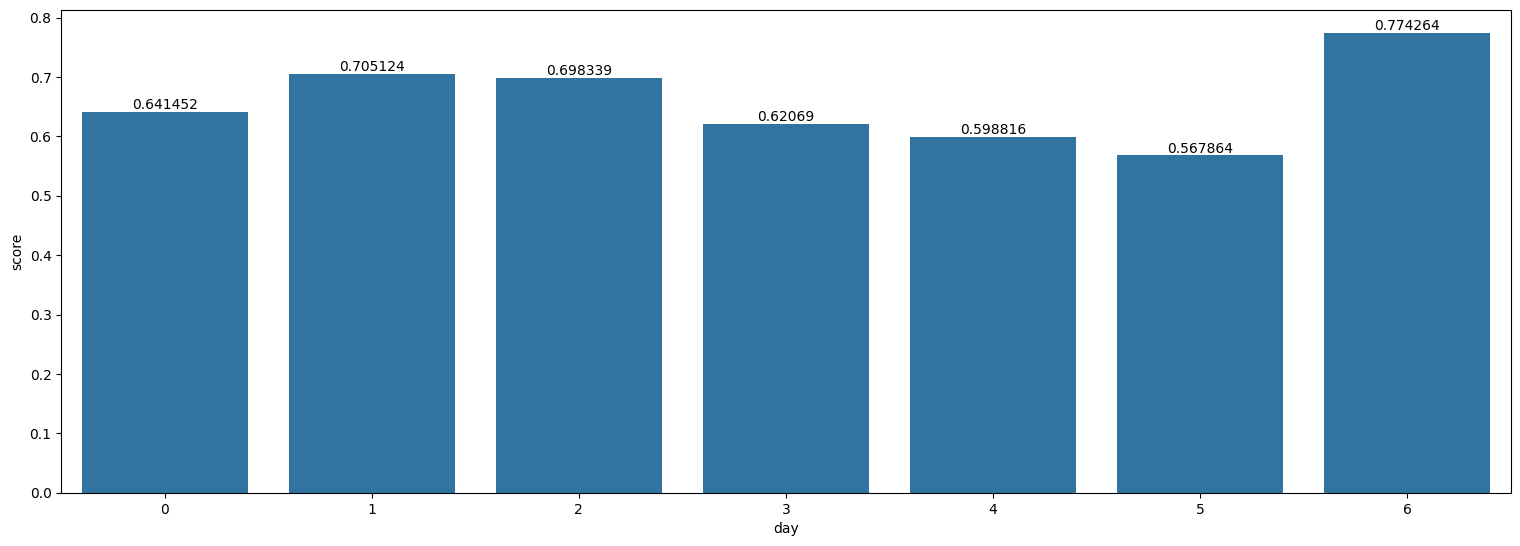

In [132]:
day_plot = sns.barplot(x = 'day', y = 'score', data = day_results)
for i in day_plot.containers:
    day_plot.bar_label(i,)

El modelo predice bien los días martes y domingos teniendo en cuenta que el martes es uno de los días con más órdenes no tomadas por un courier, sin embargo falla los días viernes y sábados a la hora de predecir sí una orden es tomada o no, por lo que es posible que hayan factores relevantes que no son capturados por el día de la semana en la que se toma el pedido para identificar sí es tomado o no. 

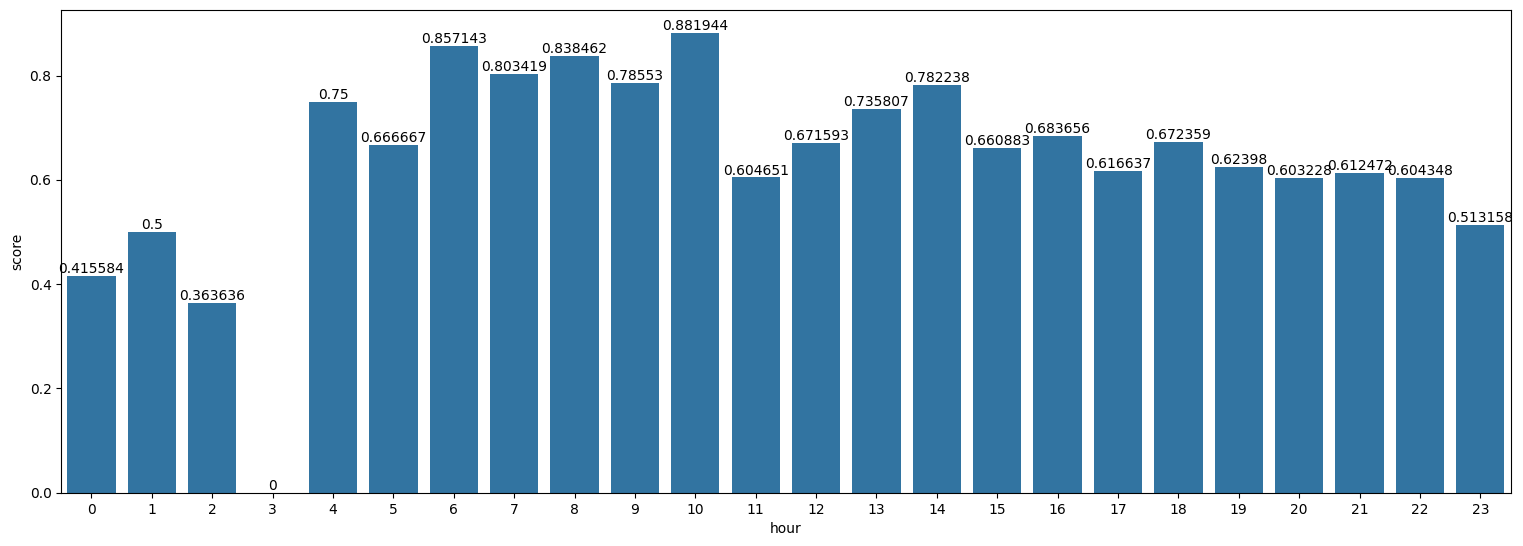

In [133]:
hour_plot = sns.barplot(x = 'hour', y = 'score', data = hour_results)
for i in hour_plot.containers:
    hour_plot.bar_label(i,)

El modelo predice bien las horas desde las 4 hasta las 10, y luego desde las 12 hasta las 16. Sin embargo la calidad del modelo decae considerablemente a las 11 y luego de las 17 horas hasta las 3 horas. Es posible que un factor relevante a la hora de que un pedido no sea tomado tenga que ver con factores no capturados en el dataset de manera directa, pero podría teorizarse que luego de las 17 horas hay menos couriers activos que concuerda con el pico de órdenes no tomadas entre las 18 y las 20 horas. Así mismo, las 12 del día es un punto en el que hay un pico de órdenes no tomadas, pero tiene sentido pensar que se debe a la misma congestión del servicio debido a que hay muchas personas interesadas en conseguir su almuerzo y no es posible que conseguir todos los courier necesarios para satisfacer la demanda.

### 5. EXTRA: XGBoost para la evaluación de variables en el modelo

Debido a que el modelo que mejor desempeño tuvo fue un modelo de tipo ensemble, pero desde sklearn es difícil acceder a la información valiosa con respecto a las variables usadas, procederemos a hacer uso del modelo XGBoost de la librería 'xgboost' que en esencia comparte muchas similitudes con el modelo realizado y permite ver mejor las interacciones entre las variables usadas.

In [134]:
from xgboost import XGBClassifier
import xgboost as xgb

In [135]:
booster = XGBClassifier(n_estimators = 32, learning_rate = 0.5, objective='binary:logistic', random_state = 1234)
booster.fit(X_train_list[0], y_train_list[0])
booster_predictions = booster.predict(X_test_list[0])

In [136]:
print('f1 = {0}, precision = {1}, recall = {2}, roc_auc = {3}, accuracy = {4}'.format(f1_score(y_test_list[0], booster_predictions), 
                                                                                      precision_score(y_test_list[0], booster_predictions), 
                                                                                      recall_score(y_test_list[0], booster_predictions), 
                                                                                      roc_auc_score(y_test_list[0], booster_predictions), 
                                                                                      accuracy_score(y_test_list[0], booster_predictions)))

f1 = 0.652402784853116, precision = 0.6496449103821441, recall = 0.6551841746248295, roc_auc = 0.6478557930723037, accuracy = 0.6479188166494668


La ventaja de que las estimaciones no cambien mucho, es que el análisis realizado previamente puede ser válido para las inferencias que ya hicimos, por lo que el plus sería indagar respecto a la importancia de las variables y el árbol base construido

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

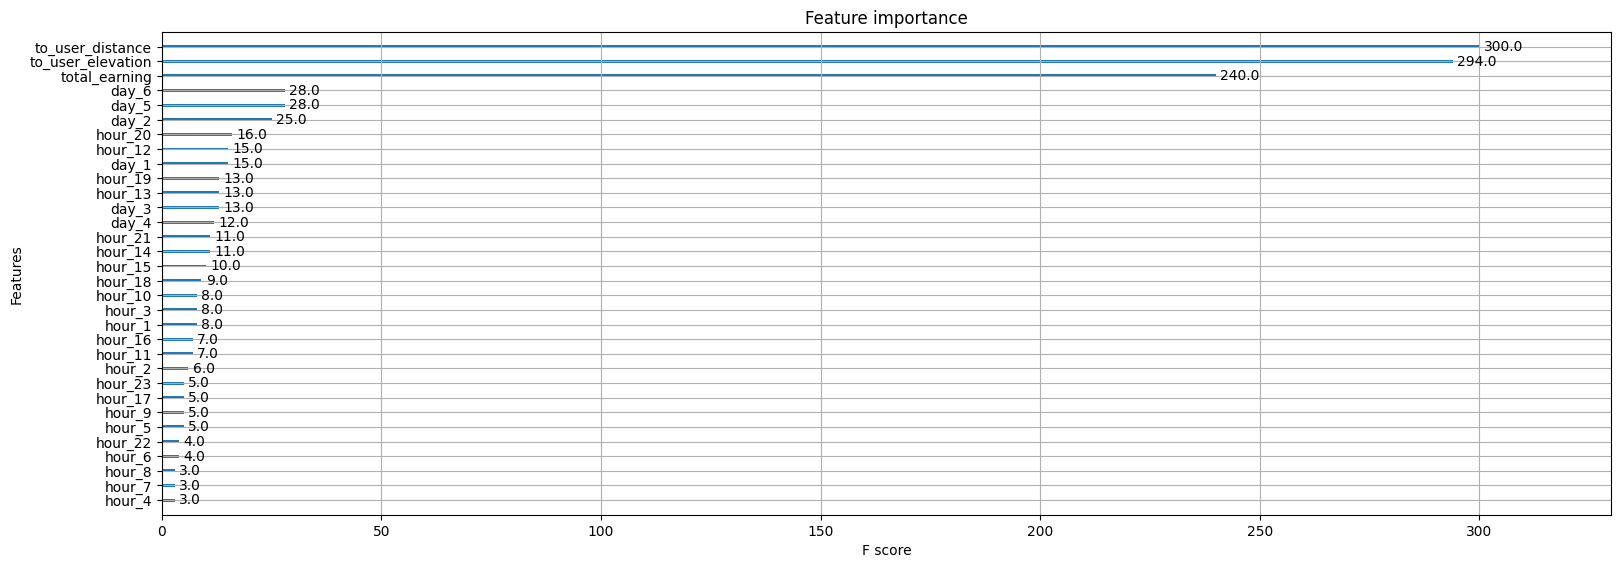

In [137]:
xgb.plot_importance(booster)

In [138]:
def plot_tree(xgb_model, filename, rankdir='UT'):
    """
    Plot the tree in high resolution
    :param xgb_model: xgboost trained model
    :param filename: the pdf file where this is saved
    :param rankdir: direction of the tree: default Top-Down (UT), accepts:'LR' for left-to-right tree
    :return:
    """
    import xgboost as xgb
    import os
    gvz = xgb.to_graphviz(xgb_model, rankdir=rankdir)
    _, file_extension = os.path.splitext(filename)
    format = file_extension.strip('.').lower()
    data = gvz.pipe(format=format)
    full_filename = filename
    with open(full_filename, 'wb') as f:
        f.write(data)

plot_tree(booster, 'xgboost_test_tree.pdf')


[21:58:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


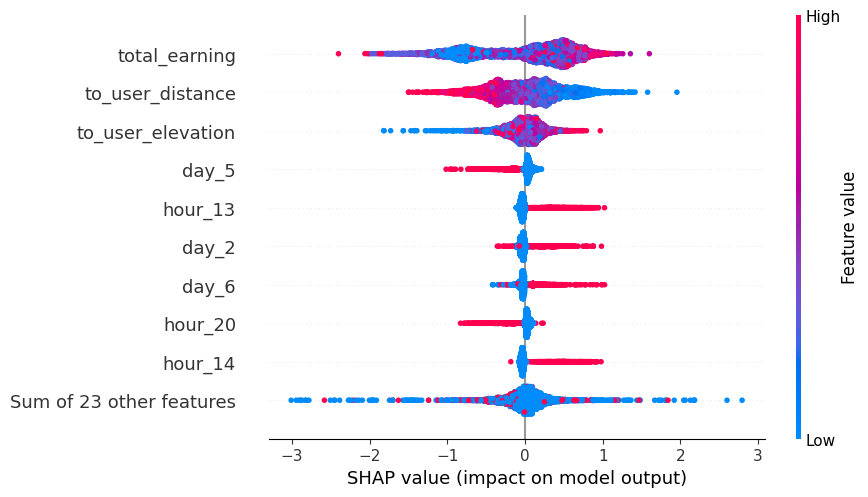

In [139]:
import shap


explainer = shap.TreeExplainer(booster)
explanation = explainer(X_test_list[0])

shap_values = explanation.values
shap.plots.beeswarm(explanation)

Con la visión que se tiene de la importancia de las variables, se ve que la variable con mayor impacto es la distancia del usuario al comercio, seguida de la altitud respecto al comercio y finalmente las ganancias totales. Según los valores graficados de SHAP, la ganancia total tiene un efecto positivo e importante en el resultado del modelo, lo que significa que a mayor ganancia, mayor posibilidad hay de que se acepte la orden por un courier; en el caso de la distancia del usuario al comercio, los valores de mayor impacto son aquellos con menor magnitud, reiterando entonces los hallazgos de que entre más cerca esté un usuario del comercio, más probable es que la orden sea aceptada. Analizando por días y por horas, los pedidos realizados el sábado (day_5), a las 20 horas (hour_20) y en menor medida los días miércoles (day_2) tienen más posibilidades de no ser aceptados; a las 13 horas y a las 14 horas es más probable que un pedido sea aceptado. 

## Parte 3: Insights y recomendaciones

En el análisis de datos preliminar, se identificaron varios patrones que vale la pena resaltar. A manera de enumeración, se tiene:
* El 92.28% de las órdenes son tomadas, lo que quiere decir que el 7.72% de las órdenes no son tomadas por ningún courier. En total, 9689 órdenes no fueron tomadas por ningún courier a lo largo del mes analizado. 
* La variable con mayor variación, medida por medio del coeficiente de variación, es la altitud entre el usuario y el comercio. 
* Los picos más altos de actividad diaria, es decir, las horas donde hay más pedidos concuerdan con la hora del almuerzo (entre las 12 y las 14 horas) y la hora de la cena (entre las 18 y las 20 horas); y los picos de actividad semanal se concentran en el fin de semana (viernes, sábado y domingo)
* En las órdenes no tomadas, buena parte se concentra luego de las 18 horas, donde se tiene la hipótesis de que es debido a la cultura de trabajo local cuya jornada laboral va desde las 7 horas hasta las 18 en algunos casos; y también existe un pico en órdenes no tomadas a las 12 del día, donde se tiene la hipótesis que es debido a la saturación debido a la hora del almuerzo y no hay suficientes courier para satisfacer la demanda. 
* El porcentaje de órdenes no tomadas aumenta drásticamente luego de las 18 horas hasta las 6 horas, llegando al punto máximo entre las 2 horas y las 6 horas. 
* Los días con mayor cantidad de órdenes no tomadas son los martes y los sábados. Los días con mayor porcentaje de órdenes no tomadas son los sábados 10% y los viernes 8.9%
* El día con menor cantidad de órdenes no tomadas es el domingo, y es el mismo con el menor porcentaje de órdenes no tomadas con 4.7%
* Existe una ligera correlación entre la distancia del usuario al comercio, con la cantidad total ganada por el courier. 
* Existe evidencia estadística de que los pedidos no aceptados por un courier suelen tener una menor ganancia para el courier y una mayor distancia entre el usuario y el comercio, analizando el promedio, cosa que no es fácil identificar de manera gráfica.
* Debido a la estructura de los datos, es difícil ajustar un modelo con los datos de entrada, por lo que fue necesario rebalancear el dataset haciendo uso de under-sampling para capturar adecuadamente la clase no predominante (órdenes no tomadas). Se compusieron 4 datasets para validar que el modelo capturara bien las características principales del experimento y evitar al máximo el overfitting. 
* Por la diferencia en hora del día y día de la semana, se decidió usar estas variables cómo explicativas para el modelo por medio de dummys que representen cada valor individualmente
* Por la variación de las variables continuas, y los valores de las mismas, se decidió usar un estandarizador para convertir estas variables. 
* Se estableció una partición entre train-test del 70-30. 
* Los modelos que mejor capturan el comportamiento de las decisiones de los couriers a la hora de tomar o no un pedido, son los modelos de tipo ensemble comprendidos como árboles de clasificación. 
* Los modelos tienen un comportamiento similar en estadísticos entre train y test, con excepción de la métrica ROC-AUC que alcanza a perder 5 puntos básicos de bondad de ajuste, mostrando que el experimento es robusto. 
* Al analizar la métrica f1 con el ajuste por días, el modelo flaquea a la hora de capturar adecuadamente ambas categorías el día sábado, que casualmente es el día con mayor cantidad de órdenes no aceptadas y el día con mayor porcentaje de órdenes no aceptadas.
* Al analizar la métrica f1 con el ajuste por horas del día, el modelo flaquea en horas nocturnas principalmente luego de las 19 horas, las horas en las que es más probable que un pedido no sea aceptado. 

#### Recomendaciones

- Es altamente relevante la ganancia del courier a la hora de definir sí un pedido es tomado o no. Debido a que gran parte de las órdenes no aceptadas se concentran en la noche, se recomienda un incremento para la ganancia del courier dependiendo de la hora del día, ya que en la noche existe un sacrificio mayor teniendo en cuenta el alto tráfico y la inseguridad inherente a la ciudad de noche.

- Es altamente relevante la distancia del usuario al comercio para que un courier decida sí tomar la orden o no, se recomienda una tasa a pagar por parte del usuario que tenga en cuenta la distancia del usuario al comercio. Otra solución es presentarle al usuario una selección de comercios que no se encuentren más allá de 3km de distancia para evitar pagar este adicional y que sea un incentivo para los courier para aceptar órdenes que puedan estar más lejanas. 

- Con el resultado del modelo XGBoost, se identifican patrones diarios y horarios clave para atacar el problema de no aceptación de las órdenes, por lo que se debería evaluar subir la tarifa de los días sábados y subir la tarifa a las 20 horas, ya que la ganancia del courier es la variable por la cual se pueden modificar los resultados del modelo y es altamente relevante a la hora de determinar sí un courier acepta la orden o no. 

- Para un próximo análisis, valdría la pena hacer la inclusión del nivel de precipitaciones y la probabilidad de precipitaciones ya que justo en los meses de septiembre y octubre hay un pico en la probabilidad de precipitaciones, y es importante debido a que buena parte de los courier se suele desplazar en moto o medios de transporte que están más expuestos a condiciones climáticas adversas. 

#### Maximización de las órdenes

- Centrarse en sitios altamente concurridos por estudiantes y profesionales donde hayan también varios comercios cercanos, con el fin de minimizar por un lado la distancia del usuario final al comercio y por otro la distancia recorrida por el courier de su posición actual al comercio.

- Ofrecer propinas mayores a los courier dependiendo de la hora del día y la distancia del comercio al usuario final, con el fin de incentivar el tomar órdenes que en otros casos sería menos atractivo tomar. 

- Para evitar el pico de órdenes no tomadas a las 12 del día, hacer promociones de productos de comercios desde poco antes de las 11 para que las personas no esperen hasta las 12 para realizar su pedido y descongestionar un poco la hora del almuerzo. También, según el modelo XGBoost se podrían pasar promociones a las 13 y 14 horas para descongestionar la hora 12. 

- Plantear la posibilidad de mejorar la cantidad de pedidos los días miércoles y domingo, que son los días con menos porcentaje de órdenes no aceptadas, por medio de promociones, rappicréditos u opciones atractivas.

- Después de cierta hora, mostrar sólo comercios a menos de 2km de distancia para evitar que la orden no sea aceptada y minimizando la distancia que tenga que recorrer el courier en horarios nocturnos. 

## Parte 4: Minado de datos

In [140]:
import time
import requests
import json
import datetime

In [141]:
api_key = pd.read_csv("../documentos/api_key.txt", sep = " ").columns[1]

In [142]:
api_key

'5916f7e80ca0fa770844003c4c63a5e2'

In [143]:


lat_lon = pd.read_csv("../../Prueba-Rappi/documentos/Bogota_lat_lng.csv")

In [144]:
rows = []

for i in range(len(lat_lon)):
    req = requests.get('https://api.openweathermap.org/data/2.5/weather?lat={0}&lon={1}&appid={2}&units=metric'.format(lat_lon.iloc[i,2], lat_lon.iloc[i,3],api_key))
    mining = pd.json_normalize(req.json())
    whtr  = pd.DataFrame.from_dict(mining['weather'][0])
    fixed = pd.merge(mining, whtr, left_index= True, right_index=True).drop('weather', axis = 1)
    rows.append(fixed)
    time.sleep(5)
    



In [145]:
final_web_scrap = pd.concat(rows)
final_web_scrap['dt'] = final_web_scrap['dt'].apply(lambda x: datetime.datetime.fromtimestamp(x))
final_web_scrap['sys.sunrise'] = final_web_scrap['sys.sunrise'].apply(lambda x: datetime.datetime.fromtimestamp(x))
final_web_scrap['sys.sunset'] = final_web_scrap['sys.sunset'].apply(lambda x: datetime.datetime.fromtimestamp(x))

In [146]:
# Final final
final_web_scrap.describe()


,visibility,dt,timezone,id_x,cod,coord.lon,coord.lat,main.temp,main.feels_like,main.temp_min,...,main.pressure,main.humidity,wind.speed,wind.deg,clouds.all,sys.type,sys.id,sys.sunrise,sys.sunset,id_y
count,59.0,59,59.0,5.900000e+01,59.0,59.000000,59.000000,59.000000,59.000000,59.000000,...,59.0,59.0,5.900000e+01,59.0,59.0,59.0,59.0,59,59,59.0
mean,10000.0,2023-12-13 22:00:35.966101760,-18000.0,4.683258e+06,200.0,-74.093561,4.669542,12.561186,12.483390,12.561186,...,1025.0,100.0,1.540000e+00,350.0,40.0,1.0,8582.0,2023-12-13 05:54:56.033897984,2023-12-13 17:46:10.915254272,802.0
min,10000.0,2023-12-13 21:50:07,-18000.0,3.665965e+06,200.0,-74.178000,4.582300,10.920000,10.680000,10.920000,...,1025.0,100.0,1.540000e+00,350.0,40.0,1.0,8582.0,2023-12-13 05:54:43,2023-12-13 17:45:48,802.0
25%,10000.0,2023-12-13 21:59:43,-18000.0,3.669799e+06,200.0,-74.120650,4.632450,12.760000,12.700000,12.760000,...,1025.0,100.0,1.540000e+00,350.0,40.0,1.0,8582.0,2023-12-13 05:54:50,2023-12-13 17:46:02,802.0
50%,10000.0,2023-12-13 22:01:14,-18000.0,3.678413e+06,200.0,-74.091100,4.669100,12.950000,12.910000,12.950000,...,1025.0,100.0,1.540000e+00,350.0,40.0,1.0,8582.0,2023-12-13 05:54:55,2023-12-13 17:46:11,802.0
75%,10000.0,2023-12-13 22:02:27,-18000.0,5.360969e+06,200.0,-74.067300,4.710500,12.975000,12.935000,12.975000,...,1025.0,100.0,1.540000e+00,350.0,40.0,1.0,8582.0,2023-12-13 05:55:01.500000,2023-12-13 17:46:19,802.0
max,10000.0,2023-12-13 22:04:15,-18000.0,8.182090e+06,200.0,-74.031900,4.761800,13.050000,13.020000,13.050000,...,1025.0,100.0,1.540000e+00,350.0,40.0,1.0,8582.0,2023-12-13 05:55:14,2023-12-13 17:46:38,802.0
std,0.0,NaN,0.0,1.768882e+06,0.0,0.034985,0.049613,0.745300,0.818815,0.745300,...,0.0,0.0,4.479012e-16,0.0,0.0,0.0,0.0,NaN,NaN,0.0
